In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from sklearn.cluster import KMeans
import acquire
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook

Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

Choose features other than the ones used in the lesson.\
Visualize the results of your clustering.\
Use the elbow method to visually select a good value for k.\
Repeat the clustering, this time with 3 different features.

In [2]:
iris = data('iris')

In [3]:
iris.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa


In [4]:
# renamed columns
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa


In [5]:
# lets create two new features : sepal area and petal area:
iris['sepal_area'] = iris.sepal_length * iris.sepal_width
iris['petal_area'] = iris.petal_length * iris.petal_width

In [6]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
1,5.1,3.5,1.4,0.2,setosa,17.85,0.28
2,4.9,3.0,1.4,0.2,setosa,14.70,0.28


In [7]:
# We will use petal area and sepal length for clustering

X = iris[['petal_area', 'sepal_length']]

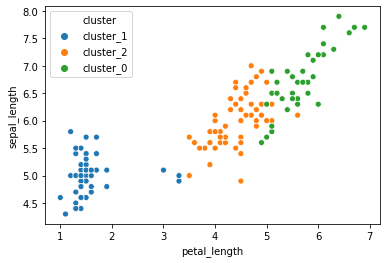

In [8]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
kmeans.predict(X)
iris['cluster'] = kmeans.predict(X)
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
sns.scatterplot(x = 'petal_length', y = 'sepal_length', data = iris, hue = 'cluster')

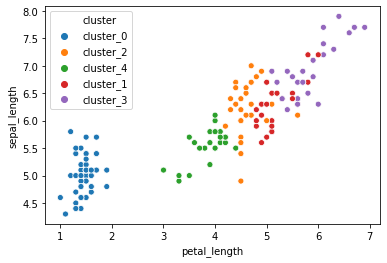

In [9]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)
kmeans.predict(X)
iris['cluster'] = kmeans.predict(X)
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
sns.scatterplot(x = 'petal_length', y = 'sepal_length', data = iris, hue = 'cluster')

In [10]:
iris.groupby('cluster').count()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
cluster,,,,,,,
cluster_0,50,50,50,50,50,50,50
cluster_1,22,22,22,22,22,22,22
cluster_2,28,28,28,28,28,28,28
cluster_3,27,27,27,27,27,27,27
cluster_4,23,23,23,23,23,23,23


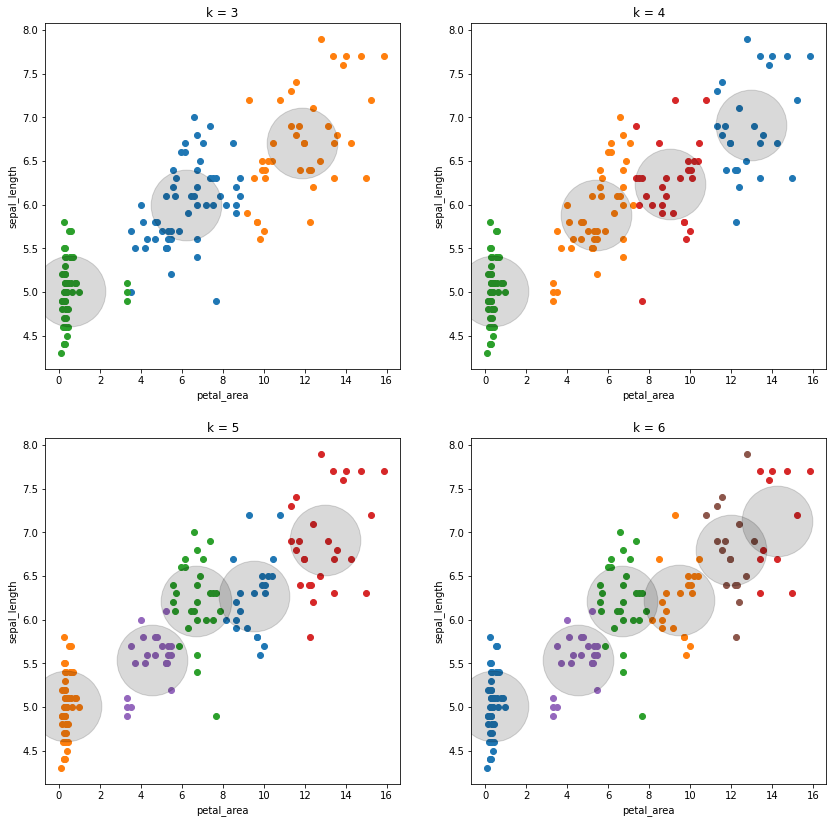

In [11]:
plt.figure(figsize=(14, 14))
for i, k in enumerate([3, 4, 5, 6]):
    plt.subplot(2, 2, i + 1)
    kmeans = KMeans(k)
    kmeans.fit(X)
    iris['cluster'] = kmeans.predict(X)
    iris.cluster = 'cluster ' + iris.cluster.astype(str)
    for cluster, subset in iris.groupby('cluster'):
        plt.scatter(subset.petal_area, subset.sepal_length, label=cluster)

    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    centroids.plot.scatter(y='sepal_length', x='petal_area', ax=plt.gca(), alpha=.15, s=5000, c='black')
    plt.title(f'k = {k}')

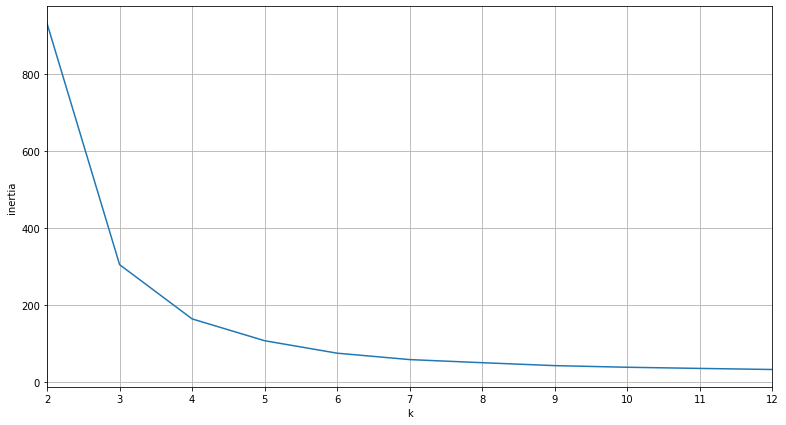

In [12]:
def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

#### lets repeat this now with three features petal_area, sepal_length and sepal_width

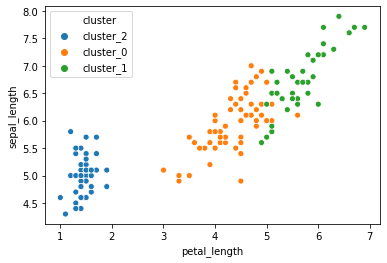

In [13]:
X = iris[['petal_area', 'sepal_length', 'sepal_width']]
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
sns.scatterplot(x = 'petal_length', y = 'sepal_length', data = iris, hue = 'cluster')    

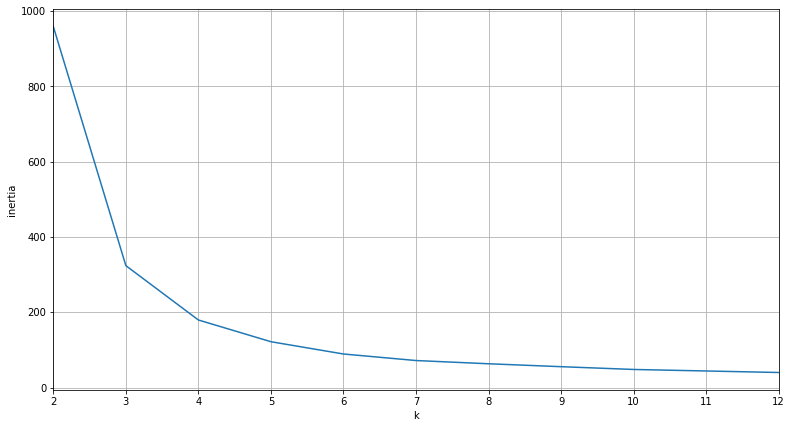

In [14]:
def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [15]:
def mall_customers():
    query = """
    SELECT * FROM customers
    """
    df = pd.read_sql(query, acquire.get_db_url('mall_customers'))
    return df

In [16]:
df = mall_customers()

In [17]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
X = df[['age', 'annual_income', 'spending_score']]

In [19]:
scaler = MinMaxScaler(copy=True, feature_range=(0,1)).fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])

In [20]:
X_scaled

,age,annual_income,spending_score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


In [134]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_scaled)
df['clusters'] = kmeans.predict(X_scaled)
df['clusters'] = 'cluster_' + df.clusters.astype(str)

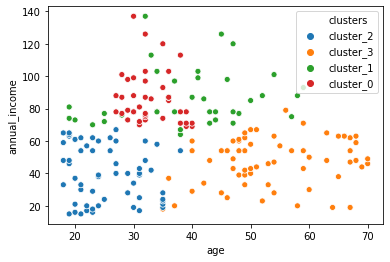

In [135]:
sns.scatterplot(x = 'age', y = 'annual_income', data =df, hue = 'clusters')    

In [141]:
centroids

,age,annual_income,spending_score,clusters
0,0.141026,0.082748,0.806608,2.000000e+00
1,0.401381,0.571248,0.186028,3.000000e+00
2,0.286058,0.582787,0.821684,8.881784e-16
3,0.136364,0.297317,0.509276,5.000000e+00
4,0.725160,0.325649,0.480230,1.000000e+00
5,0.569838,0.100949,0.183673,4.000000e+00


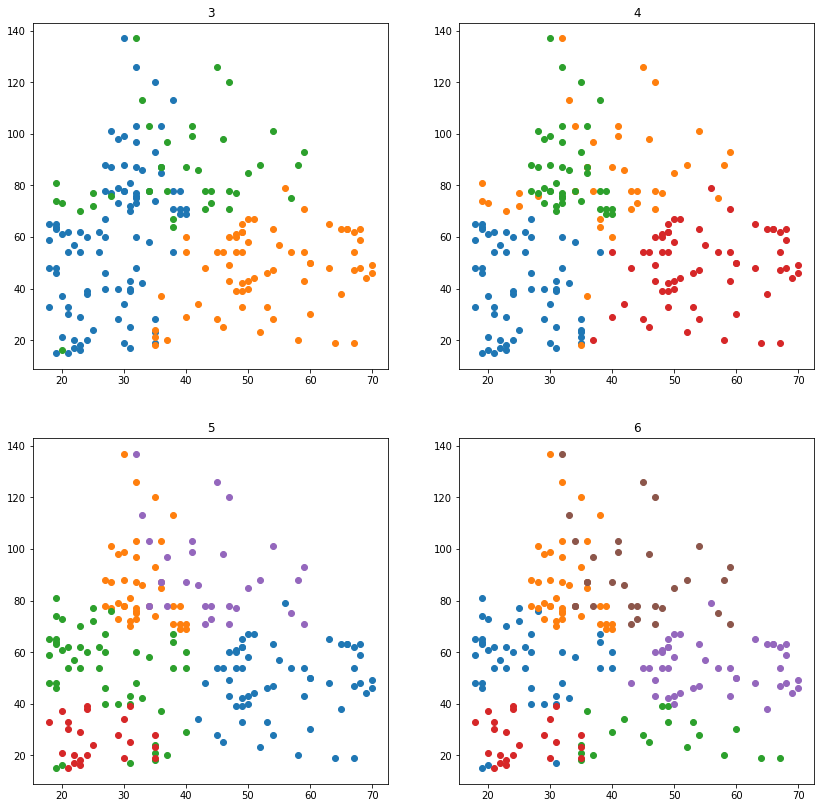

In [22]:
plt.figure(figsize=(14, 14))
for i, k in enumerate([3, 4, 5, 6]):
    plt.subplot(2, 2, i + 1)
    kmeans = KMeans(k)
    kmeans.fit(X_scaled)
    df['clusters'] = kmeans.predict(X_scaled)
    df.clusters = 'cluster_' + df.clusters.astype(str)
    for clusters, subset1 in df.groupby('clusters'):
        plt.scatter(subset1.age, subset1.annual_income, label=cluster)
        plt.title(k)

#     centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
#     centroids.plot.scatter(y='annual_income', x='age', ax=plt.gca(), alpha=.15, s=5000, c='black')
#     plt.title(f'k = {k}')

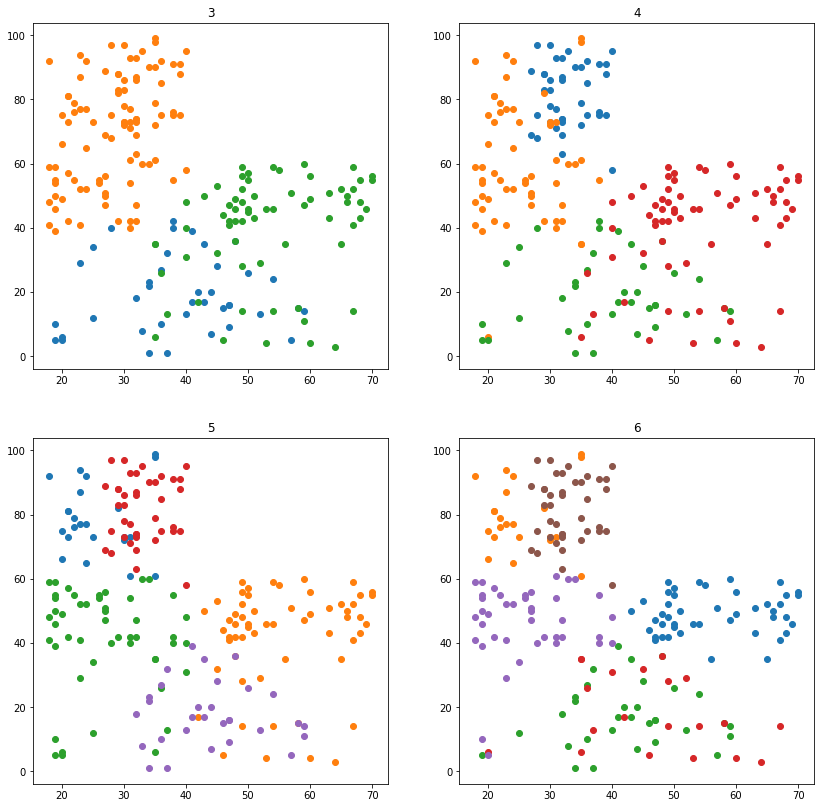

In [23]:
plt.figure(figsize=(14, 14))
for i, k in enumerate([3, 4, 5, 6]):
    plt.subplot(2, 2, i + 1)
    kmeans = KMeans(k)
    kmeans.fit(X_scaled)
    df['clusters'] = kmeans.predict(X_scaled)
    df.clusters = 'cluster_' + df.clusters.astype(str)
    for clusters, subset1 in df.groupby('clusters'):
        plt.scatter(subset1.age, subset1.spending_score, label=cluster)
        plt.title(k)
    
#     centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X_scaled.columns)
#     centroids.plot.scatter(x='age', y='spending_score', ax=plt.gca(), alpha=.15, s=5000, c='black')
#     plt.title(f'k = {k}')

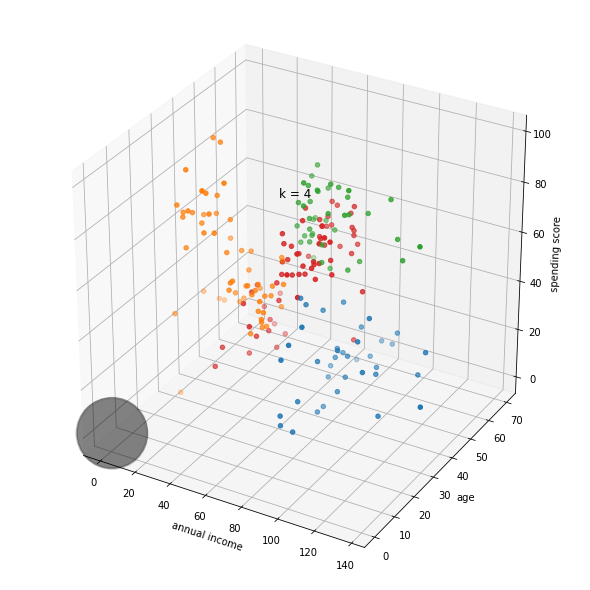

In [24]:

fig = plt.figure(figsize=(8, 8))
for i, k in enumerate([4]):
    plt.subplot(2, 2, i + 1)
    ax = Axes3D(fig)
    kmeans = KMeans(k)
    kmeans.fit(X_scaled)
    df['clusters'] = kmeans.predict(X_scaled)
    df.clusters = 'cluster_' + df.clusters.astype(str)
    for clusters, subset1 in df.groupby('clusters'):
        ax.scatter(subset1.annual_income, subset1.age, subset1.spending_score, label=cluster)
        plt.xlabel('annual income')
        plt.ylabel('age')
        ax.set_zlabel('spending score')
        #plt.zlabel('spending score')
        plt.title(k)
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X_scaled.columns)
    ax.scatter(centroids.annual_income, centroids.age, centroids.spending_score, alpha=.15, s=5000, c='black')
    #centroids.plot.scatter(y='age', x='annual_income', ax=plt.gca(), alpha=.15, s=5000, c='black')
    plt.title(f'k = {k}')

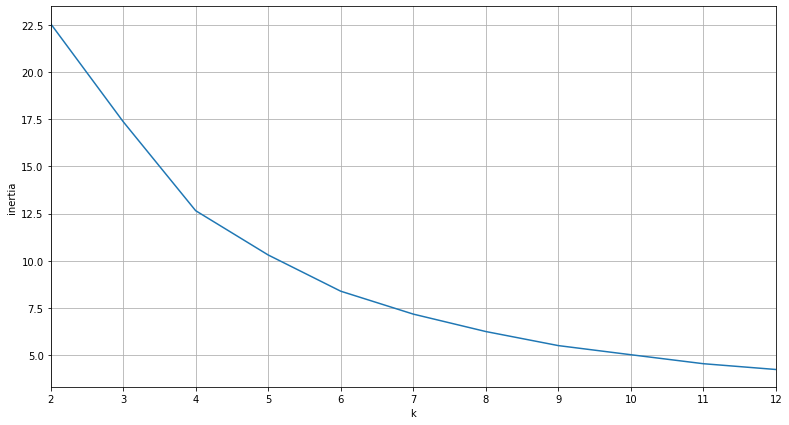

In [25]:
def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X_scaled)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

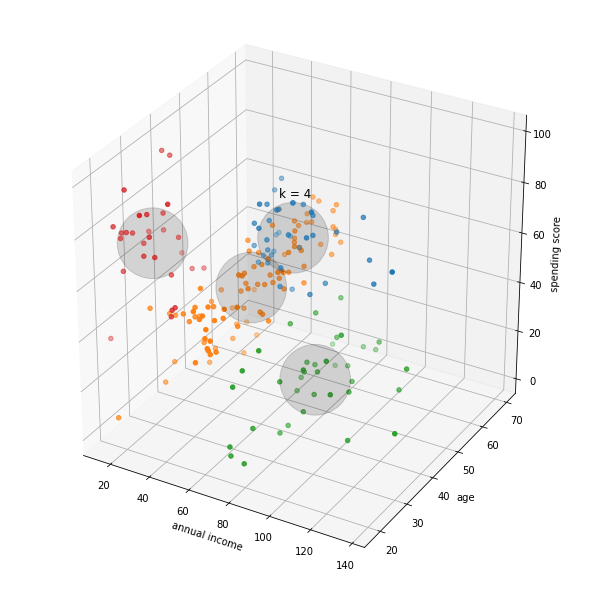

In [26]:
# plotting with unscaled 
X = df[['age', 'annual_income', 'spending_score']]
fig = plt.figure(figsize=(8, 8))
for i, k in enumerate([4]):
    plt.subplot(2, 2, i + 1)
    ax = Axes3D(fig)
    kmeans = KMeans(k)
    kmeans.fit(X)
    df['clusters'] = kmeans.predict(X)
    df.clusters = 'cluster' + df.clusters.astype(str)
    for clusters, subset1 in df.groupby('clusters'):
        ax.scatter(subset1.annual_income, subset1.age, subset1.spending_score, label=cluster)
        plt.xlabel('annual income')
        plt.ylabel('age')
        ax.set_zlabel('spending score')
        #plt.zlabel('spending score')
        plt.title(k)
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    ax.scatter(centroids.annual_income, centroids.age, centroids.spending_score, alpha=.15, s=5000, c='black')
    #centroids.plot.scatter(y='age', x='annual_income', ax=plt.gca(), alpha=.15, s=5000, c='black')
    plt.title(f'k = {k}')